In [5]:
import numpy as np 
import pandas as pd


In [6]:
data=pd.read_csv("dataArcan.csv")

In [7]:
data.head()

,Unnamed: 0,Month,Tourism,Business,Others
0,2015.0,01/01/2015,72%,15%,13%
1,NaN,02/02/2015,68%,18.5%,13.5%
2,NaN,03/03/2015,60%,30%,9.99999999999999%
3,NaN,04/01/2015,60%,20%,20%
4,NaN,05/01/2015,50%,25%,25%


In [5]:
!pip3 install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 750.1 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
You should consider upgrading via the '/home/mohamed/anaconda3/bin/python -m pip install --upgrade pip' command.


In [8]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [9]:
data['Tourism']=data['Tourism'].str.rstrip('%').astype('float') / 100.0

In [10]:
data['Tourism'].head()

0    0.72
1    0.68
2    0.60
3    0.60
4    0.50
Name: Tourism, dtype: float64

In [11]:
data['Business']=data['Business'].str.rstrip('%').astype('float') / 100.0

In [12]:
data['Others']=data['Others'].str.rstrip('%').astype('float') / 100.0

In [13]:
data.index=pd.to_datetime(data["Month"])

In [14]:
data.head()

,Month,Tourism,Business,Others
Month,,,,
2015-01-01,01/01/2015,0.72,0.150,0.130
2015-02-02,02/02/2015,0.68,0.185,0.135
2015-03-03,03/03/2015,0.60,0.300,0.100
2015-04-01,04/01/2015,0.60,0.200,0.200
2015-05-01,05/01/2015,0.50,0.250,0.250


In [15]:
data.drop(["Month"],axis=1,inplace=True)

In [16]:
data.head()

,Tourism,Business,Others
Month,,,
2015-01-01,0.72,0.150,0.130
2015-02-02,0.68,0.185,0.135
2015-03-03,0.60,0.300,0.100
2015-04-01,0.60,0.200,0.200
2015-05-01,0.50,0.250,0.250


In [17]:
business=data['Business']

In [18]:
tourism=data['Tourism']

In [19]:
tourism.head()

Month
2015-01-01    0.72
2015-02-02    0.68
2015-03-03    0.60
2015-04-01    0.60
2015-05-01    0.50
Name: Tourism, dtype: float64

In [20]:
import matplotlib.pyplot as plt

/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

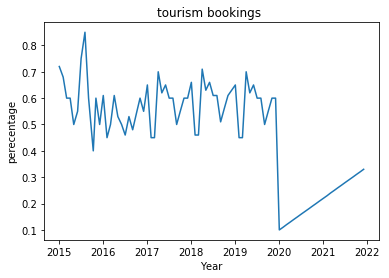

In [21]:

plt.plot(data.index,data["Tourism"])

plt.title('tourism bookings ')
plt.xlabel('Year')
plt.ylabel('perecentage')
plt.show()

/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


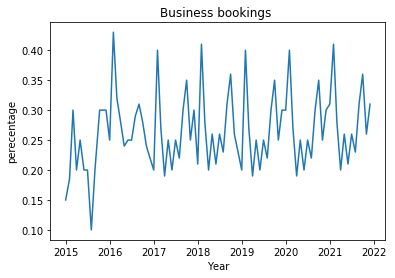

In [22]:

plt.plot(data.index,data["Business"])

plt.title('Business bookings ')
plt.xlabel('Year')
plt.ylabel('perecentage')
plt.show()

In [23]:
data.head(10)

,Tourism,Business,Others
Month,,,
2015-01-01,0.72,0.150,0.130
2015-02-02,0.68,0.185,0.135
2015-03-03,0.60,0.300,0.100
2015-04-01,0.60,0.200,0.200
2015-05-01,0.50,0.250,0.250
2015-06-02,0.55,0.200,0.250
2015-07-01,0.75,0.200,0.050
2015-08-02,0.85,0.100,0.050
2015-09-01,0.60,0.200,0.200


# seperat data to train and test set

In [24]:
def data_to_x_y(Df,WindowSize):
    data_array=Df.to_numpy()
    X=[]
    Y=[]
    
    for i in range(len(data_array)-WindowSize):
        row=[[a] for a in data_array[i:i+WindowSize] ]
        X.append(row)
        Y.append(data_array[i+WindowSize])
    return np.array(X),np.array(Y)

In [25]:
X,Y=data_to_x_y(tourism,4)

In [26]:
X

array([[[0.72],
        [0.68],
        [0.6 ],
        [0.6 ]],

       [[0.68],
        [0.6 ],
        [0.6 ],
        [0.5 ]],

       [[0.6 ],
        [0.6 ],
        [0.5 ],
        [0.55]],

       [[0.6 ],
        [0.5 ],
        [0.55],
        [0.75]],

       [[0.5 ],
        [0.55],
        [0.75],
        [0.85]],

       [[0.55],
        [0.75],
        [0.85],
        [0.6 ]],

       [[0.75],
        [0.85],
        [0.6 ],
        [0.4 ]],

       [[0.85],
        [0.6 ],
        [0.4 ],
        [0.6 ]],

       [[0.6 ],
        [0.4 ],
        [0.6 ],
        [0.5 ]],

       [[0.4 ],
        [0.6 ],
        [0.5 ],
        [0.61]],

       [[0.6 ],
        [0.5 ],
        [0.61],
        [0.45]],

       [[0.5 ],
        [0.61],
        [0.45],
        [0.5 ]],

       [[0.61],
        [0.45],
        [0.5 ],
        [0.61]],

       [[0.45],
        [0.5 ],
        [0.61],
        [0.53]],

       [[0.5 ],
        [0.61],
        [0.53],
        [0.5 ]],

       [[0

In [27]:
X.shape

(79, 4, 1)

In [28]:
Y.shape

(79,)

In [29]:
0.6*79# 60% of data points to train model 

47.4

In [30]:
x_train,y_train=X[:48],Y[:48]
x_test,y_test=X[48:],Y[48:]

# build the LSTM model 

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [84]:
tourism_model=Sequential()
tourism_model.add(InputLayer((4,1)))
tourism_model.add(LSTM(32))
tourism_model.add(Dense(16,'relu'))

tourism_model.add(Dense(8,'relu'))
tourism_model.add(Dense(1))

In [85]:
tourism_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [87]:
tourism_model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [88]:
tourism_model.fit(x_train,y_train,epochs=90)

Epoch 1/90
48/48 [==============================] - 1s 14ms/sample - loss: 0.3720 - root_mean_squared_error: 0.6099
Epoch 2/90
48/48 [==============================] - 0s 305us/sample - loss: 0.3293 - root_mean_squared_error: 0.5738
Epoch 3/90
48/48 [==============================] - 0s 441us/sample - loss: 0.2903 - root_mean_squared_error: 0.5388
Epoch 4/90
48/48 [==============================] - 0s 424us/sample - loss: 0.2585 - root_mean_squared_error: 0.5084
Epoch 5/90
48/48 [==============================] - 0s 340us/sample - loss: 0.2282 - root_mean_squared_error: 0.4777
Epoch 6/90
48/48 [==============================] - 0s 475us/sample - loss: 0.2064 - root_mean_squared_error: 0.4543
Epoch 7/90
48/48 [==============================] - 0s 354us/sample - loss: 0.1893 - root_mean_squared_error: 0.4350
Epoch 8/90
48/48 [==============================] - 0s 448us/sample - loss: 0.1717 - root_mean_squared_error: 0.4144
Epoch 9/90
48/48 [==============================] - 0s 381us/samp

48/48 [==============================] - 0s 374us/sample - loss: 0.0096 - root_mean_squared_error: 0.0981
Epoch 71/90
48/48 [==============================] - 0s 365us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 72/90
48/48 [==============================] - 0s 385us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 73/90
48/48 [==============================] - 0s 363us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 74/90
48/48 [==============================] - 0s 302us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 75/90
48/48 [==============================] - 0s 327us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 76/90
48/48 [==============================] - 0s 374us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 77/90
48/48 [==============================] - 0s 301us/sample - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 78/90
48/48 [==============================] - 0s 333us/sample

In [89]:
pridictions =tourism_model.predict(x_test).flatten()

/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

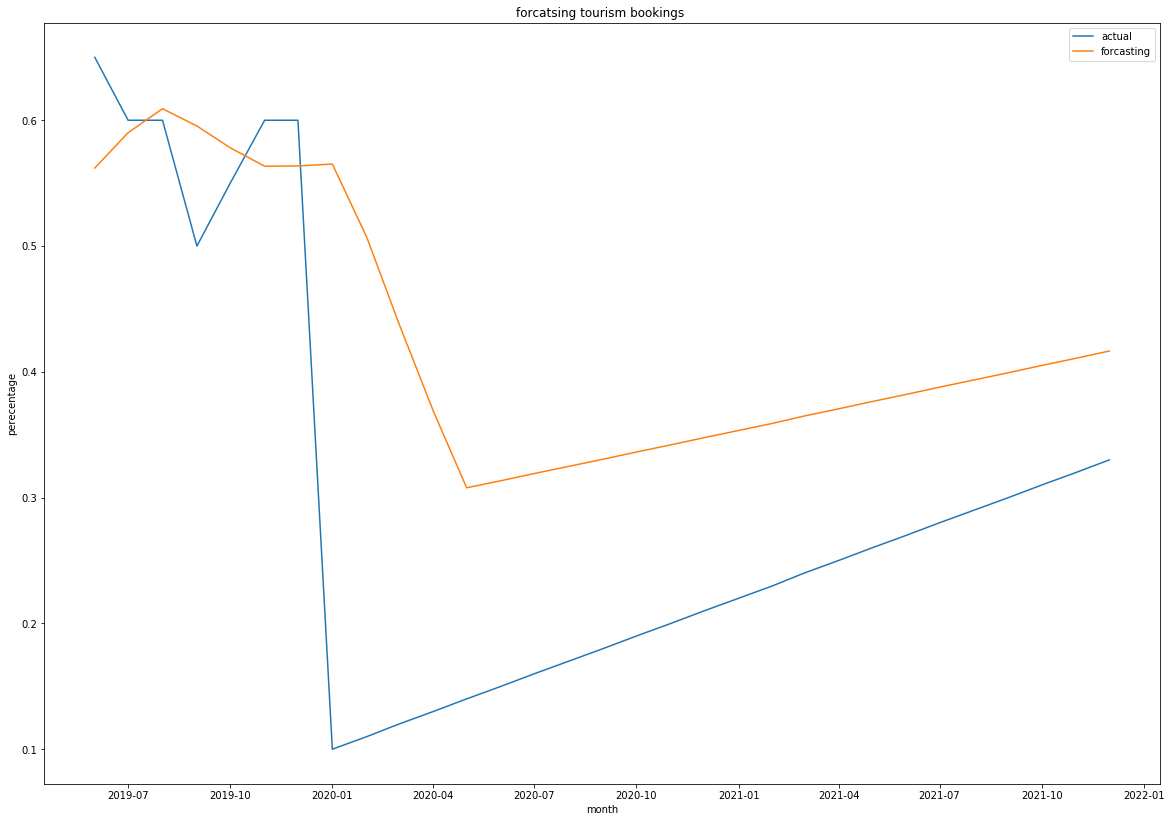

In [90]:

plt.plot(data.index[52:], y_test,label='actual')
plt.plot(data.index[52:],pridictions ,label="forcasting")

plt.title('forcatsing tourism bookings ')
plt.xlabel('month')
plt.ylabel('perecentage')
plt.rcParams["figure.figsize"] = (20,14)
plt.legend()
plt.show()

# For buisness bookings 

In [37]:
buisness_model=Sequential()
buisness_model.add(InputLayer((3,1)))
buisness_model.add(LSTM(32))


buisness_model.add(Dense(8,'relu'))
buisness_model.add(Dense(1))

In [38]:
buisness_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_b,Y_b=data_to_x_y(business,3)

In [40]:
X_b.shape

(80, 3, 1)

In [41]:
0.6*80# 60% of data points to train model 

48.0

In [42]:
x_train_b,y_train_b=X_b[:48],Y_b[:48]
x_test_b,y_test_b=X_b[48:],Y_b[48:]

In [65]:
buisness_model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.025),metrics=[RootMeanSquaredError()])

In [66]:
buisness_model.fit(x_train_b,y_train_b,epochs=200)

Epoch 1/200
48/48 [==============================] - 1s 11ms/sample - loss: 0.0044 - root_mean_squared_error: 0.0662
Epoch 2/200
48/48 [==============================] - 0s 446us/sample - loss: 0.0034 - root_mean_squared_error: 0.0579
Epoch 3/200
48/48 [==============================] - 0s 365us/sample - loss: 0.0051 - root_mean_squared_error: 0.0712
Epoch 4/200
48/48 [==============================] - 0s 328us/sample - loss: 0.0042 - root_mean_squared_error: 0.0652
Epoch 5/200
48/48 [==============================] - 0s 384us/sample - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 6/200
48/48 [==============================] - 0s 328us/sample - loss: 0.0042 - root_mean_squared_error: 0.0647
Epoch 7/200
48/48 [==============================] - 0s 345us/sample - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 8/200
48/48 [==============================] - 0s 369us/sample - loss: 0.0039 - root_mean_squared_error: 0.0623
Epoch 9/200
48/48 [==============================] - 0s 4

Epoch 70/200
48/48 [==============================] - 0s 341us/sample - loss: 0.0035 - root_mean_squared_error: 0.0589
Epoch 71/200
48/48 [==============================] - 0s 289us/sample - loss: 0.0035 - root_mean_squared_error: 0.0596
Epoch 72/200
48/48 [==============================] - 0s 355us/sample - loss: 0.0035 - root_mean_squared_error: 0.0592
Epoch 73/200
48/48 [==============================] - 0s 317us/sample - loss: 0.0035 - root_mean_squared_error: 0.0591
Epoch 74/200
48/48 [==============================] - 0s 348us/sample - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 75/200
48/48 [==============================] - 0s 283us/sample - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 76/200
48/48 [==============================] - 0s 351us/sample - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 77/200
48/48 [==============================] - 0s 315us/sample - loss: 0.0035 - root_mean_squared_error: 0.0589
Epoch 78/200
48/48 [============================

48/48 [==============================] - 0s 330us/sample - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 139/200
48/48 [==============================] - 0s 355us/sample - loss: 0.0027 - root_mean_squared_error: 0.0524
Epoch 140/200
48/48 [==============================] - 0s 343us/sample - loss: 0.0030 - root_mean_squared_error: 0.0551
Epoch 141/200
48/48 [==============================] - 0s 384us/sample - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 142/200
48/48 [==============================] - 0s 304us/sample - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 143/200
48/48 [==============================] - 0s 323us/sample - loss: 0.0029 - root_mean_squared_error: 0.0543
Epoch 144/200
48/48 [==============================] - 0s 275us/sample - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 145/200
48/48 [==============================] - 0s 268us/sample - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 146/200
48/48 [==============================] -

In [67]:
pridictions_b =buisness_model.predict(x_test_b).flatten()

/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mohamed/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

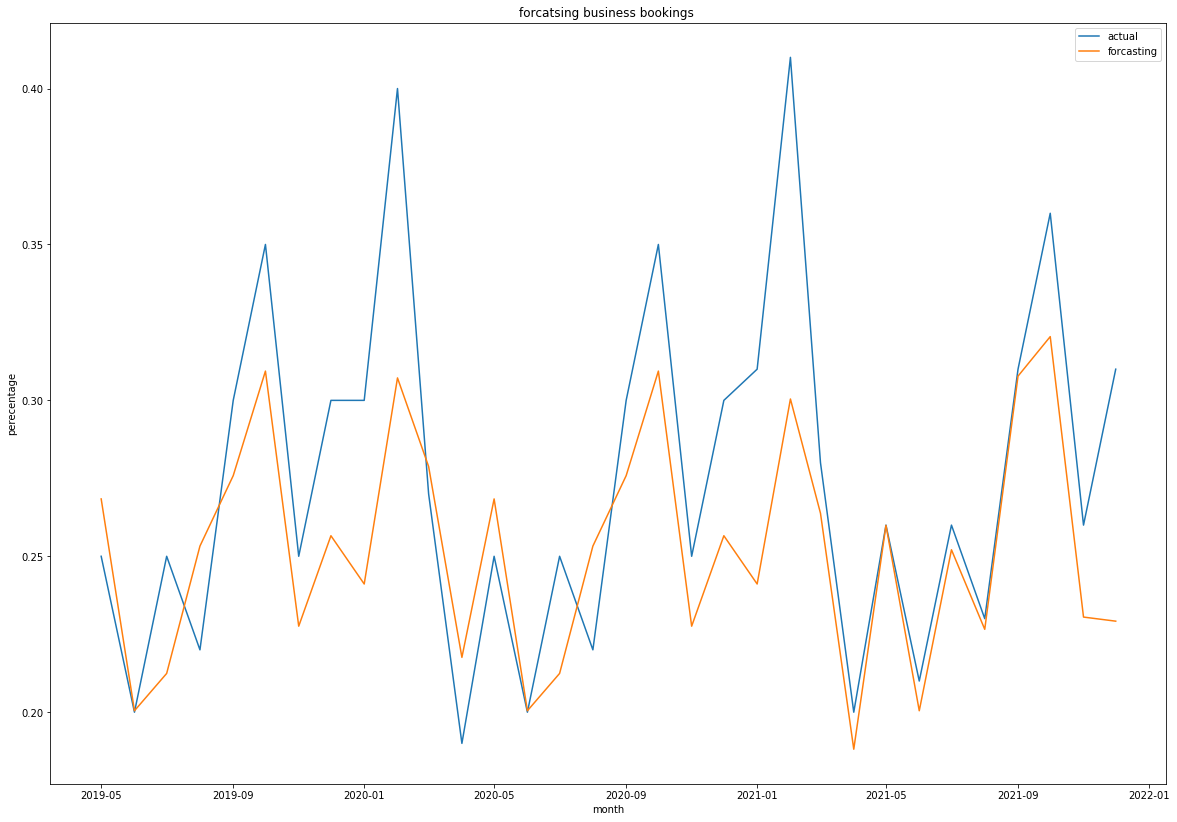

In [68]:

plt.plot(data.index[51:], y_test_b,label='actual')
plt.plot(data.index[51:],pridictions_b ,label="forcasting")

plt.title('forcatsing business bookings ')
plt.xlabel('month')
plt.ylabel('perecentage')
plt.rcParams["figure.figsize"] = (20,14)
plt.legend()
plt.show()

In [92]:
pridictions



array([0.56198597, 0.5900831 , 0.6091771 , 0.5954192 , 0.5781137 ,
       0.56344503, 0.56365705, 0.5651595 , 0.50699097, 0.43832585,
       0.36870745, 0.30780357, 0.31347892, 0.31916144, 0.3248509 ,
       0.33054686, 0.33624902, 0.34195715, 0.34767085, 0.35338986,
       0.3591138 , 0.36484236, 0.37057525, 0.37631208, 0.3820526 ,
       0.38779643, 0.39354327, 0.39929283, 0.4050447 , 0.41079858,
       0.4165542 ], dtype=float32)

In [93]:
pred_tourism=pd.DataFrame(pridictions)

In [95]:
pred_tourism.columns=["tourism"]

In [96]:
pred_tourism.head()

,tourism
0,0.561986
1,0.590083
2,0.609177
3,0.595419
4,0.578114


In [97]:
pred_Buisness=pd.DataFrame(pridictions_b)

In [98]:
pred_Buisness.columns=["Buisness"]

In [104]:
F_preds=pd.concat([pred_tourism,pred_Buisness],axis=1)

In [105]:
F_preds.head()

,tourism,Buisness
0,0.561986,0.268399
1,0.590083,0.200462
2,0.609177,0.212434
3,0.595419,0.253270
4,0.578114,0.275862


In [206]:
F_preds.to_csv("preds.csv")

# In above cells we bulit two models and test them on testing data  
<h3> now we will use those two models to predicting  months a head 2022</h3>

In [107]:
tourism_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [207]:
tourism_model.save("tourism_model")

In [108]:
tourism.head()

Month
2015-01-01    0.72
2015-02-02    0.68
2015-03-03    0.60
2015-04-01    0.60
2015-05-01    0.50
Name: Tourism, dtype: float64

<h3> now use last 4 months in the tourism dataframe to predict next months  </h3>

In [111]:
tourism.tail(4)

Month
2021-09-01    0.30
2021-10-01    0.31
2021-11-01    0.32
2021-12-01    0.33
Name: Tourism, dtype: float64

In [229]:
new_t=tourism.tail(4)

In [230]:
new_t

Month
2021-09-01    0.30
2021-10-01    0.31
2021-11-01    0.32
2021-12-01    0.33
Name: Tourism, dtype: float64

In [232]:
X_2022=np.array(new_t).reshape(1,4,1)

In [233]:
X_2022.shape

(1, 4, 1)

In [234]:
Y_2022=tourism_model.predict(X_2022).flatten()

In [235]:
Y_2022

array([0.4223112], dtype=float32)

# <h3> now use last 3 months in the buisness dataframe to predict next months  </h3>

In [140]:
buisness_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________


In [211]:
X_B=np.array(business.tail(3))

In [220]:
X_B=X_B.reshape(1,3,1)

In [225]:
X_B

array([[[0.36],
        [0.26],
        [0.31]]])

In [222]:
Y_B_2022=buisness_model.predict(X_B).flatten()

In [223]:
Y_B_2022

array([0.25873727], dtype=float32)

In [224]:
buisness_model.save("buisness_model")

# use pridected data to forcast more than one month ahead 